## **Import Libraries**

In [1]:
# Import necessary libraries for data manipulation, visualization, and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  mplfinance as mlf

## **Load and Inspect the Dataset**

In [2]:
# Load the dataset, convert dates, and inspect its structure
# The dataset includes columns such as Open, High, Low, Close, Volume, and Adjusted Close prices.
data=pd.read_csv('infy_stock.csv')

In [3]:
# Display the first 10 rows of the dataset to understand its structure and content
print("\n First 5 rows of the dataset:")
data.head()


 First 5 rows of the dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,0.794921,0.796679,0.791015,0.796679,0.549483,204800.0
1,1996-01-02,0.794921,0.798828,0.793457,0.793457,0.547260,204800.0
2,1996-01-03,0.798828,0.798828,0.798828,0.798828,0.550965,102400.0
3,1996-01-04,0.791015,0.794921,0.791015,0.793554,0.547327,307200.0
4,1996-01-05,0.784179,0.784179,0.784179,0.784179,0.540861,51200.0


## **Handle Missing Value**

In [4]:
# Showing the shape of the data.
data.shape

(6501, 7)

In [5]:
# Showing the shape of the data after removing missing elements.
data.dropna().shape

(6487, 7)

In [6]:
# Checking the Data
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,0.794921,0.796679,0.791015,0.796679,0.549483,204800.0
1,1996-01-02,0.794921,0.798828,0.793457,0.793457,0.547260,204800.0
2,1996-01-03,0.798828,0.798828,0.798828,0.798828,0.550965,102400.0
3,1996-01-04,0.791015,0.794921,0.791015,0.793554,0.547327,307200.0
4,1996-01-05,0.784179,0.784179,0.784179,0.784179,0.540861,51200.0
...,...,...,...,...,...,...,...
6496,2021-10-12,1677.000000,1689.000000,1662.000000,1685.150024,1685.150024,7439300.0
6497,2021-10-13,1695.949951,1713.650024,1680.050049,1709.199951,1709.199951,7104171.0
6498,2021-10-14,1754.000000,1783.599976,1698.199951,1715.750000,1715.750000,19655776.0
6499,2021-10-18,1740.000000,1799.000000,1740.000000,1792.150024,1792.150024,13438109.0


In [7]:
# Section 3: Handle Missing Values and Format Data.
# Convert 'Date' column to datetime format.
# Handle missing values using forward fill to maintain data consistency.
data.index = pd.to_datetime(data.index, errors='coerce')
data.sort_index(inplace=True)          
data.ffill(inplace=True)

# Inspect the dataset for shape and missing values.

print(f"Dataset shape: {data.shape}")
print("Remaining NaNs per column:\n", data.isna().sum())




Dataset shape: (6501, 7)
Remaining NaNs per column:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


print("\nFirst 10 rows of the dataset:")
data.head()

## **Calculate Financial Metrics**

In [8]:
# Add calculated columns to derive insights:
# - Daily Return %: Percentage change between the open and close price of each trading day.
# - MA50 & MA200: Moving averages over 50 and 200 days to identify short- and long-term trends.
# - Volatility: Rolling standard deviation over 30 days to measure price fluctuations.
# - Trend: Boolean indicator for bullish (True) or bearish (False) trend based on moving averages.

data['Daily Return %'] = ((data['Close'] - data['Open']) / data['Open']) * 100
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()
data['Trend'] = data['MA50'] > data['MA200']
data['Volatility'] = data['Close'].rolling(window=30).std()

## **Descriptive Statistics**

In [9]:
# Calculate and display key metrics to understand the dataset
average_daily_return = data['Daily Return %'].mean()
median_daily_return = data['Daily Return %'].median()
std_closing_price = data['Close'].std()

print(f"Average Daily Return: {average_daily_return:.2f}%")
print(f"Median Daily Return: {median_daily_return:.2f}%")
print(f"Standard Deviation of Closing Prices: {std_closing_price:.2f}")

Average Daily Return: 0.02%
Median Daily Return: 0.00%
Standard Deviation of Closing Prices: 317.35


## **Visualizations**

**Closing Price with Moving Averages and Trends**

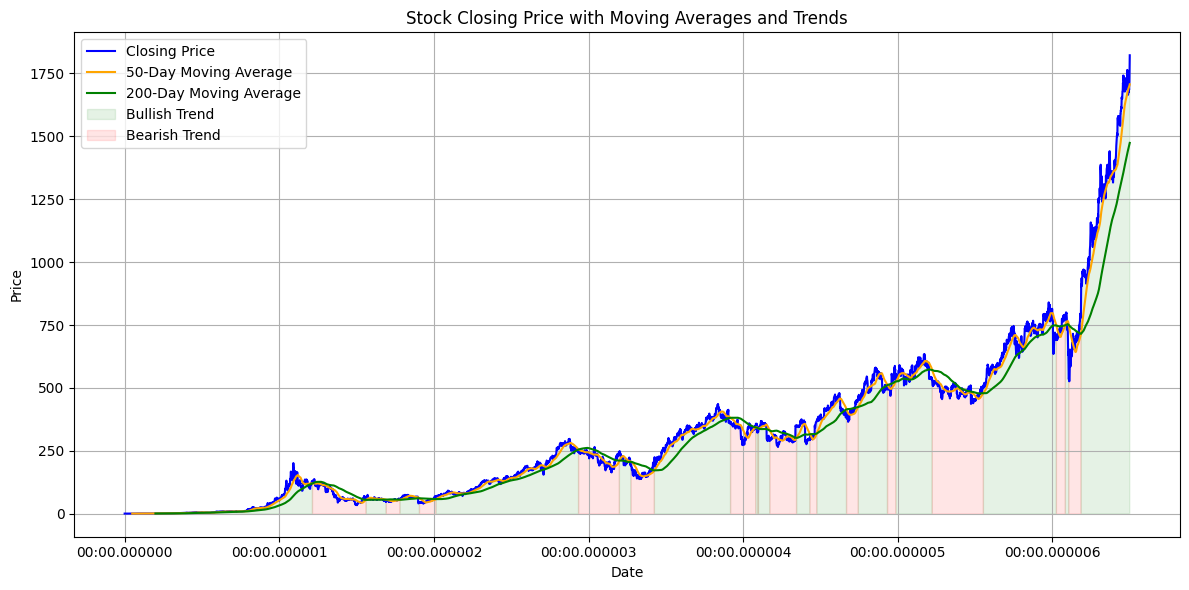

In [10]:
# Visualize Closing Price with Moving Averages and Trends
# Plot the closing price alongside 50-day and 200-day moving averages to identify trends.
# Highlight bullish and bearish trends using green and red shading.

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Closing Price', color='blue')
plt.plot(data.index, data['MA50'], label='50-Day Moving Average', color='orange')
plt.plot(data.index, data['MA200'], label='200-Day Moving Average', color='green')
plt.fill_between(data.index, data['Close'], where=data['Trend'], color='green', alpha=0.1, label='Bullish Trend')
plt.fill_between(data.index, data['Close'], where=~data['Trend'], color='red', alpha=0.1, label='Bearish Trend')
plt.title('Stock Closing Price with Moving Averages and Trends')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Candlestick Chart**

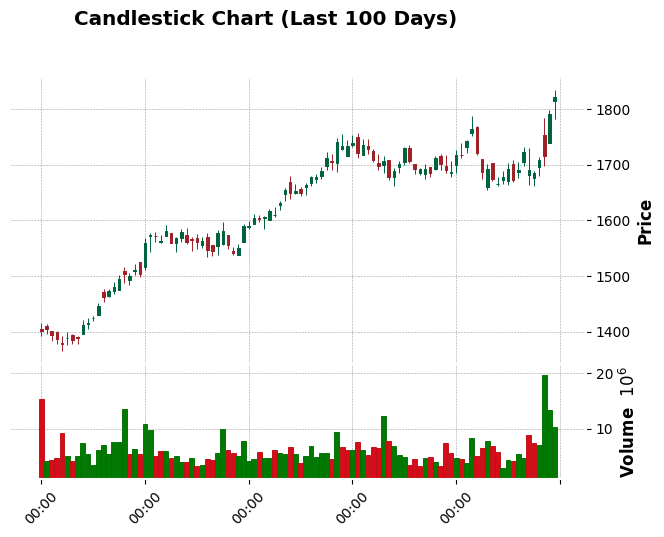

In [11]:
# Visualize Candlestick Chart
# Generate a candlestick chart for the last 100 trading days to visualize price action and volume.

mlf.plot(data[-100:], type='candle', volume=True, style='charles', title='Candlestick Chart (Last 100 Days)')


**Volatility Over Time**

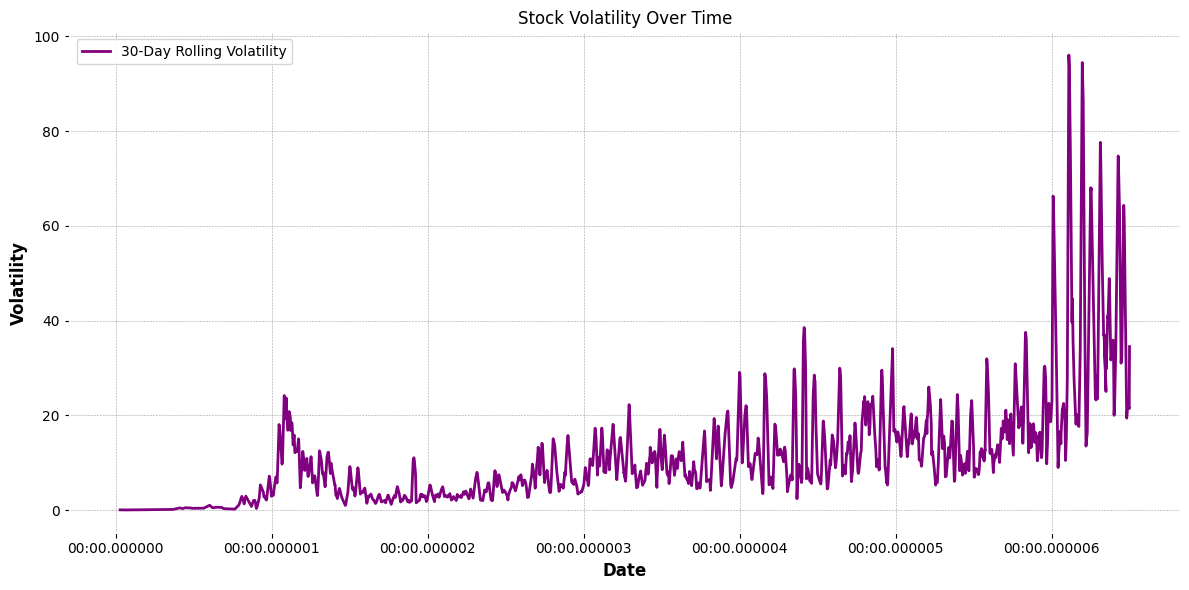

In [12]:
# Visualize Volatility Over Time
#Plot the 30-day rolling standard deviation to illustrate price fluctuations over time.

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Volatility'], label='30-Day Rolling Volatility', color='purple')
plt.title('Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Daily Return Distribution**

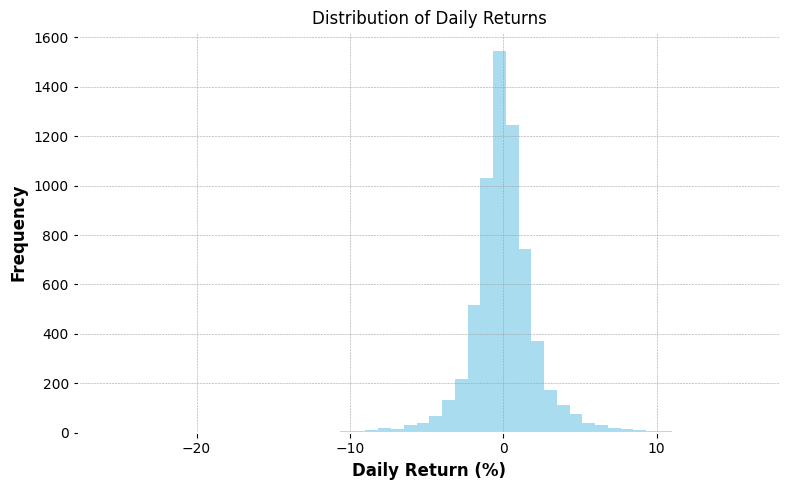

In [13]:
# Visualize Daily Return Distribution
# Plot the histogram of daily returns to analyze their distribution and understand return behavior.

plt.figure(figsize=(8, 5))
plt.hist(data['Daily Return %'], bins=50, color='skyblue', alpha=0.7)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


## **Insights and Recommendations**

In [14]:
# Summarize findings from the analysis
print("\n--- Insights and Recommendations ---\n")
print(f"1. Bullish Trends: Identified periods with a 50-day MA above the 200-day MA.")
print(f"2. Volatility: Significant volatility observed, standard deviation of closing prices is {std_closing_price:.2f}.")
print(f"3. Average Daily Return: {average_daily_return:.2f}%, indicating moderate growth.")
print(f"4. Recommendations:")
print(f"   - Consider investing during identified bullish periods.")
print(f"   - Avoid trading during high volatility phases for risk-averse strategies.")


--- Insights and Recommendations ---

1. Bullish Trends: Identified periods with a 50-day MA above the 200-day MA.
2. Volatility: Significant volatility observed, standard deviation of closing prices is 317.35.
3. Average Daily Return: 0.02%, indicating moderate growth.
4. Recommendations:
   - Consider investing during identified bullish periods.
   - Avoid trading during high volatility phases for risk-averse strategies.
